In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import tqdm
import copy
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 


In [2]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        #self.hidden = nn.Linear(4, 8)
        #self.act = nn.ReLU()
        #self.output = nn.Linear(8, 3)
        
        self.input_layer    = nn.Linear(4, 32)
        self.hidden_layer1  = nn.Linear(32,16)
        self.output_layer   = nn.Linear(16, 3)
        self.relu = nn.ReLU()
 
    def forward(self, x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [3]:
def get_accuracy_multiclass(pred_arr,original_arr):
    
    if len(pred_arr)!=len(original_arr):
        return False
    
    acc = (torch.argmax(pred_arr, 1) == torch.argmax(original_arr, 1)).float().mean()
    
    return acc

In [4]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [5]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
print(ohe.categories_)

y = ohe.transform(y)
print(y)


[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]


In [7]:
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
#X = torch.tensor(X.values, dtype=torch.float32)
#y = torch.tensor(y, dtype=torch.float32)
 
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [8]:
# loss metric and optimizer
model = Multiclass()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# prepare model and training parameters
n_epochs = 200
batch_size = 10
batches_per_epoch = len(X_train) // batch_size

In [10]:
best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

In [11]:
# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    
    # set model in training mode and run through each batch
    model.train()
    
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            
            # update weights
            optimizer.step()
            
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
            
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
        
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

Epoch 0: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.81batch/s, acc=0.4, loss=1.13]


Epoch 0 validation: Cross-entropy=1.06, Accuracy=55.6%


Epoch 1: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 126.20batch/s, acc=0.4, loss=1.08]


Epoch 1 validation: Cross-entropy=0.99, Accuracy=71.1%


Epoch 2: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 110.03batch/s, acc=0.8, loss=1.03]


Epoch 2 validation: Cross-entropy=0.92, Accuracy=91.1%


Epoch 3: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.59batch/s, acc=0.9, loss=0.976]


Epoch 3 validation: Cross-entropy=0.85, Accuracy=80.0%


Epoch 4: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.08batch/s, acc=0.8, loss=0.921]


Epoch 4 validation: Cross-entropy=0.77, Accuracy=82.2%


Epoch 5: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.74batch/s, acc=0.7, loss=0.867]


Epoch 5 validation: Cross-entropy=0.69, Accuracy=82.2%


Epoch 6: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.04batch/s, acc=0.7, loss=0.809]


Epoch 6 validation: Cross-entropy=0.61, Accuracy=82.2%


Epoch 7: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.03batch/s, acc=0.8, loss=0.751]


Epoch 7 validation: Cross-entropy=0.54, Accuracy=82.2%


Epoch 8: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.40batch/s, acc=0.9, loss=0.694]


Epoch 8 validation: Cross-entropy=0.48, Accuracy=82.2%


Epoch 9: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 82.65batch/s, acc=0.9, loss=0.641]


Epoch 9 validation: Cross-entropy=0.44, Accuracy=84.4%


Epoch 10: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.37batch/s, acc=0.9, loss=0.592]


Epoch 10 validation: Cross-entropy=0.40, Accuracy=86.7%


Epoch 11: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.77batch/s, acc=0.9, loss=0.547]


Epoch 11 validation: Cross-entropy=0.36, Accuracy=86.7%


Epoch 12: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 100.41batch/s, acc=0.9, loss=0.506]


Epoch 12 validation: Cross-entropy=0.33, Accuracy=86.7%


Epoch 13: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.86batch/s, acc=0.9, loss=0.469]


Epoch 13 validation: Cross-entropy=0.31, Accuracy=86.7%


Epoch 14: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.96batch/s, acc=0.9, loss=0.435]


Epoch 14 validation: Cross-entropy=0.28, Accuracy=88.9%


Epoch 15: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.49batch/s, acc=0.9, loss=0.406]


Epoch 15 validation: Cross-entropy=0.26, Accuracy=91.1%


Epoch 16: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 89.61batch/s, acc=0.9, loss=0.379]


Epoch 16 validation: Cross-entropy=0.25, Accuracy=91.1%


Epoch 17: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.32batch/s, acc=0.9, loss=0.355]


Epoch 17 validation: Cross-entropy=0.23, Accuracy=91.1%


Epoch 18: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 88.70batch/s, acc=0.9, loss=0.333]


Epoch 18 validation: Cross-entropy=0.21, Accuracy=93.3%


Epoch 19: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.13batch/s, acc=0.9, loss=0.312]


Epoch 19 validation: Cross-entropy=0.20, Accuracy=93.3%


Epoch 20: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.04batch/s, acc=0.9, loss=0.293]


Epoch 20 validation: Cross-entropy=0.19, Accuracy=93.3%


Epoch 21: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 81.54batch/s, acc=0.9, loss=0.275]


Epoch 21 validation: Cross-entropy=0.17, Accuracy=95.6%


Epoch 22: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.85batch/s, acc=0.9, loss=0.258]


Epoch 22 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 23: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.19batch/s, acc=0.9, loss=0.243]


Epoch 23 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 24: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.67batch/s, acc=0.9, loss=0.228]


Epoch 24 validation: Cross-entropy=0.14, Accuracy=100.0%


Epoch 25: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.73batch/s, acc=1, loss=0.215]


Epoch 25 validation: Cross-entropy=0.13, Accuracy=100.0%


Epoch 26: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 102.70batch/s, acc=1, loss=0.202]


Epoch 26 validation: Cross-entropy=0.12, Accuracy=100.0%


Epoch 27: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 88.04batch/s, acc=1, loss=0.191]


Epoch 27 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 28: 100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.04batch/s, acc=1, loss=0.18]


Epoch 28 validation: Cross-entropy=0.11, Accuracy=100.0%


Epoch 29: 100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.45batch/s, acc=1, loss=0.17]


Epoch 29 validation: Cross-entropy=0.10, Accuracy=100.0%


Epoch 30: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 103.25batch/s, acc=1, loss=0.161]


Epoch 30 validation: Cross-entropy=0.09, Accuracy=100.0%


Epoch 31: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.23batch/s, acc=1, loss=0.153]


Epoch 31 validation: Cross-entropy=0.09, Accuracy=100.0%


Epoch 32: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.59batch/s, acc=1, loss=0.145]


Epoch 32 validation: Cross-entropy=0.08, Accuracy=100.0%


Epoch 33: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.84batch/s, acc=1, loss=0.138]


Epoch 33 validation: Cross-entropy=0.08, Accuracy=100.0%


Epoch 34: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.09batch/s, acc=1, loss=0.131]


Epoch 34 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 35: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.42batch/s, acc=1, loss=0.125]


Epoch 35 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 36: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.78batch/s, acc=1, loss=0.119]


Epoch 36 validation: Cross-entropy=0.07, Accuracy=100.0%


Epoch 37: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.29batch/s, acc=1, loss=0.114]


Epoch 37 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 38: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.02batch/s, acc=1, loss=0.109]


Epoch 38 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 39: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.75batch/s, acc=1, loss=0.104]


Epoch 39 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 40: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.33batch/s, acc=1, loss=0.0999]


Epoch 40 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 41: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.21batch/s, acc=1, loss=0.0958]


Epoch 41 validation: Cross-entropy=0.06, Accuracy=100.0%


Epoch 42: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.27batch/s, acc=1, loss=0.0919]


Epoch 42 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 43: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.69batch/s, acc=1, loss=0.0884]


Epoch 43 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 44: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.64batch/s, acc=1, loss=0.0851]


Epoch 44 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 45: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.42batch/s, acc=1, loss=0.0822]


Epoch 45 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 46: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 89.76batch/s, acc=1, loss=0.0794]


Epoch 46 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 47: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.94batch/s, acc=1, loss=0.0769]


Epoch 47 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 48: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 101.17batch/s, acc=1, loss=0.0745]


Epoch 48 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 49: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 104.60batch/s, acc=1, loss=0.0723]


Epoch 49 validation: Cross-entropy=0.05, Accuracy=100.0%


Epoch 50: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.09batch/s, acc=1, loss=0.0702]


Epoch 50 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 51: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.22batch/s, acc=1, loss=0.0682]


Epoch 51 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 52: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.78batch/s, acc=1, loss=0.0663]


Epoch 52 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 53: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.81batch/s, acc=1, loss=0.0644]


Epoch 53 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 54: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.21batch/s, acc=1, loss=0.0627]


Epoch 54 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 55: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.04batch/s, acc=1, loss=0.0611]


Epoch 55 validation: Cross-entropy=0.04, Accuracy=97.8%


Epoch 56: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.66batch/s, acc=1, loss=0.0596]


Epoch 56 validation: Cross-entropy=0.04, Accuracy=97.8%


Epoch 57: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 103.32batch/s, acc=1, loss=0.0582]


Epoch 57 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 58: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.70batch/s, acc=1, loss=0.0569]


Epoch 58 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 59: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.29batch/s, acc=1, loss=0.0555]


Epoch 59 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 60: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.19batch/s, acc=1, loss=0.0542]


Epoch 60 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 61: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 87.28batch/s, acc=1, loss=0.053]


Epoch 61 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 62: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.22batch/s, acc=1, loss=0.0519]


Epoch 62 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 63: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.47batch/s, acc=1, loss=0.0508]


Epoch 63 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 64: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.87batch/s, acc=1, loss=0.0497]


Epoch 64 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 65: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.67batch/s, acc=1, loss=0.0486]


Epoch 65 validation: Cross-entropy=0.04, Accuracy=100.0%


Epoch 66: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.87batch/s, acc=1, loss=0.0477]


Epoch 66 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 67: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.09batch/s, acc=1, loss=0.0467]


Epoch 67 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 68: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.06batch/s, acc=1, loss=0.0457]


Epoch 68 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 69: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.97batch/s, acc=1, loss=0.0448]


Epoch 69 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 70: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.96batch/s, acc=1, loss=0.044]


Epoch 70 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 71: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.38batch/s, acc=1, loss=0.0432]


Epoch 71 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 72: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.64batch/s, acc=1, loss=0.0424]


Epoch 72 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 73: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.31batch/s, acc=1, loss=0.0416]


Epoch 73 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 74: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 102.07batch/s, acc=1, loss=0.0408]


Epoch 74 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 75: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.30batch/s, acc=1, loss=0.0401]


Epoch 75 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 76: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.92batch/s, acc=1, loss=0.0395]


Epoch 76 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 77: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 84.05batch/s, acc=1, loss=0.0388]


Epoch 77 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 78: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.06batch/s, acc=1, loss=0.0381]


Epoch 78 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 79: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.31batch/s, acc=1, loss=0.0374]


Epoch 79 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 80: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.21batch/s, acc=1, loss=0.0369]


Epoch 80 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 81: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.70batch/s, acc=1, loss=0.0363]


Epoch 81 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 82: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.84batch/s, acc=1, loss=0.0357]


Epoch 82 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 83: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.52batch/s, acc=1, loss=0.0351]


Epoch 83 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 84: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 103.60batch/s, acc=1, loss=0.0345]


Epoch 84 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 85: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.22batch/s, acc=1, loss=0.0341]


Epoch 85 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 86: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.79batch/s, acc=1, loss=0.0335]


Epoch 86 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 87: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.63batch/s, acc=1, loss=0.033]


Epoch 87 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 88: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.80batch/s, acc=1, loss=0.0325]


Epoch 88 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 89: 100%|██████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.17batch/s, acc=1, loss=0.032]


Epoch 89 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 90: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.62batch/s, acc=1, loss=0.0316]


Epoch 90 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 91: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.39batch/s, acc=1, loss=0.0311]


Epoch 91 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 92: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.19batch/s, acc=1, loss=0.0306]


Epoch 92 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 93: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.52batch/s, acc=1, loss=0.0302]


Epoch 93 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 94: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.53batch/s, acc=1, loss=0.0297]


Epoch 94 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 95: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.50batch/s, acc=1, loss=0.0293]


Epoch 95 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 96: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 86.03batch/s, acc=1, loss=0.0289]


Epoch 96 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 97: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 84.48batch/s, acc=1, loss=0.0286]


Epoch 97 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 98: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.72batch/s, acc=1, loss=0.0281]


Epoch 98 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 99: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.70batch/s, acc=1, loss=0.0277]


Epoch 99 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 100: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 103.25batch/s, acc=1, loss=0.0274]


Epoch 100 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 101: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.77batch/s, acc=1, loss=0.027]


Epoch 101 validation: Cross-entropy=0.03, Accuracy=100.0%


Epoch 102: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.24batch/s, acc=1, loss=0.0266]


Epoch 102 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 103: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 100.37batch/s, acc=1, loss=0.0263]


Epoch 103 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 104: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 101.55batch/s, acc=1, loss=0.026]


Epoch 104 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 105: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 104.70batch/s, acc=1, loss=0.0256]


Epoch 105 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 106: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.55batch/s, acc=1, loss=0.0253]


Epoch 106 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 107: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.66batch/s, acc=1, loss=0.025]


Epoch 107 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 108: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.41batch/s, acc=1, loss=0.0247]


Epoch 108 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 109: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.22batch/s, acc=1, loss=0.0244]


Epoch 109 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 110: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.96batch/s, acc=1, loss=0.0241]


Epoch 110 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 111: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.43batch/s, acc=1, loss=0.0238]


Epoch 111 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 112: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.26batch/s, acc=1, loss=0.0235]


Epoch 112 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 113: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.54batch/s, acc=1, loss=0.0232]


Epoch 113 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 114: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.80batch/s, acc=1, loss=0.0229]


Epoch 114 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 115: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.85batch/s, acc=1, loss=0.0227]


Epoch 115 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 116: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.82batch/s, acc=1, loss=0.0224]


Epoch 116 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 117: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.98batch/s, acc=1, loss=0.0222]


Epoch 117 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 118: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.81batch/s, acc=1, loss=0.0219]


Epoch 118 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 119: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.93batch/s, acc=1, loss=0.0216]


Epoch 119 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 120: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.37batch/s, acc=1, loss=0.0213]


Epoch 120 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 121: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.52batch/s, acc=1, loss=0.0212]


Epoch 121 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 122: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.21batch/s, acc=1, loss=0.0209]


Epoch 122 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 123: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.09batch/s, acc=1, loss=0.0206]


Epoch 123 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 124: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.32batch/s, acc=1, loss=0.0204]


Epoch 124 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 125: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.37batch/s, acc=1, loss=0.0202]


Epoch 125 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 126: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.61batch/s, acc=1, loss=0.02]


Epoch 126 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 127: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.60batch/s, acc=1, loss=0.0197]


Epoch 127 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 128: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.35batch/s, acc=1, loss=0.0195]


Epoch 128 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 129: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.59batch/s, acc=1, loss=0.0193]


Epoch 129 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 130: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 100.45batch/s, acc=1, loss=0.0191]


Epoch 130 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 131: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.98batch/s, acc=1, loss=0.0188]


Epoch 131 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 132: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.45batch/s, acc=1, loss=0.0186]


Epoch 132 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 133: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.91batch/s, acc=1, loss=0.0185]


Epoch 133 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 134: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.47batch/s, acc=1, loss=0.0182]


Epoch 134 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 135: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 100.26batch/s, acc=1, loss=0.018]


Epoch 135 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 136: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.95batch/s, acc=1, loss=0.0178]


Epoch 136 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 137: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.80batch/s, acc=1, loss=0.0177]


Epoch 137 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 138: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 87.03batch/s, acc=1, loss=0.0175]


Epoch 138 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 139: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.83batch/s, acc=1, loss=0.0173]


Epoch 139 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 140: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.38batch/s, acc=1, loss=0.0171]


Epoch 140 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 141: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.14batch/s, acc=1, loss=0.0169]


Epoch 141 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 142: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.27batch/s, acc=1, loss=0.0168]


Epoch 142 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 143: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.06batch/s, acc=1, loss=0.0166]


Epoch 143 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 144: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.78batch/s, acc=1, loss=0.0164]


Epoch 144 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 145: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.32batch/s, acc=1, loss=0.0162]


Epoch 145 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 146: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.99batch/s, acc=1, loss=0.016]


Epoch 146 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 147: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.09batch/s, acc=1, loss=0.0159]


Epoch 147 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 148: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.58batch/s, acc=1, loss=0.0158]


Epoch 148 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 149: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.29batch/s, acc=1, loss=0.0156]


Epoch 149 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 150: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.17batch/s, acc=1, loss=0.0155]


Epoch 150 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 151: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 104.26batch/s, acc=1, loss=0.0153]


Epoch 151 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 152: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.81batch/s, acc=1, loss=0.0151]


Epoch 152 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 153: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 102.92batch/s, acc=1, loss=0.015]


Epoch 153 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 154: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.99batch/s, acc=1, loss=0.0148]


Epoch 154 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 155: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.65batch/s, acc=1, loss=0.0147]


Epoch 155 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 156: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 86.09batch/s, acc=1, loss=0.0146]


Epoch 156 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 157: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.67batch/s, acc=1, loss=0.0144]


Epoch 157 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 158: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 89.61batch/s, acc=1, loss=0.0142]


Epoch 158 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 159: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.31batch/s, acc=1, loss=0.0141]


Epoch 159 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 160: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.68batch/s, acc=1, loss=0.014]


Epoch 160 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 161: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 109.32batch/s, acc=1, loss=0.0138]


Epoch 161 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 162: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 100.18batch/s, acc=1, loss=0.0137]


Epoch 162 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 163: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 100.87batch/s, acc=1, loss=0.0136]


Epoch 163 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 164: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.34batch/s, acc=1, loss=0.0135]


Epoch 164 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 165: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.12batch/s, acc=1, loss=0.0133]


Epoch 165 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 166: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.77batch/s, acc=1, loss=0.0132]


Epoch 166 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 167: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.47batch/s, acc=1, loss=0.0131]


Epoch 167 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 168: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 105.89batch/s, acc=1, loss=0.013]


Epoch 168 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 169: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 100.91batch/s, acc=1, loss=0.0129]


Epoch 169 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 170: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.14batch/s, acc=1, loss=0.0127]


Epoch 170 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 171: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.16batch/s, acc=1, loss=0.0126]


Epoch 171 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 172: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.77batch/s, acc=1, loss=0.0125]


Epoch 172 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 173: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 89.98batch/s, acc=1, loss=0.0124]


Epoch 173 validation: Cross-entropy=0.02, Accuracy=100.0%


Epoch 174: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.30batch/s, acc=1, loss=0.0123]


Epoch 174 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 175: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.29batch/s, acc=1, loss=0.0121]


Epoch 175 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 176: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.54batch/s, acc=1, loss=0.012]


Epoch 176 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 177: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.24batch/s, acc=1, loss=0.0119]


Epoch 177 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 178: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.36batch/s, acc=1, loss=0.0118]


Epoch 178 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 179: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.20batch/s, acc=1, loss=0.0117]


Epoch 179 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 180: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.65batch/s, acc=1, loss=0.0116]


Epoch 180 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 181: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 104.61batch/s, acc=1, loss=0.0115]


Epoch 181 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 182: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.05batch/s, acc=1, loss=0.0114]


Epoch 182 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 183: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.36batch/s, acc=1, loss=0.0113]


Epoch 183 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 184: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.15batch/s, acc=1, loss=0.0112]


Epoch 184 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 185: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 101.81batch/s, acc=1, loss=0.011]


Epoch 185 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 186: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.00batch/s, acc=1, loss=0.011]


Epoch 186 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 187: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 102.81batch/s, acc=1, loss=0.0109]


Epoch 187 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 188: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 94.88batch/s, acc=1, loss=0.0108]


Epoch 188 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 189: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.96batch/s, acc=1, loss=0.0107]


Epoch 189 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 190: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 101.53batch/s, acc=1, loss=0.0106]


Epoch 190 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 191: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.72batch/s, acc=1, loss=0.0105]


Epoch 191 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 192: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.23batch/s, acc=1, loss=0.0104]


Epoch 192 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 193: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.20batch/s, acc=1, loss=0.0104]


Epoch 193 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 194: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.18batch/s, acc=1, loss=0.0102]


Epoch 194 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 195: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 102.45batch/s, acc=1, loss=0.0101]


Epoch 195 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 196: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 95.47batch/s, acc=1, loss=0.0101]


Epoch 196 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 197: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 99.90batch/s, acc=1, loss=0.00999]


Epoch 197 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 198: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.72batch/s, acc=1, loss=0.0099]


Epoch 198 validation: Cross-entropy=0.01, Accuracy=100.0%


Epoch 199: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.18batch/s, acc=1, loss=0.0098]


Epoch 199 validation: Cross-entropy=0.01, Accuracy=100.0%


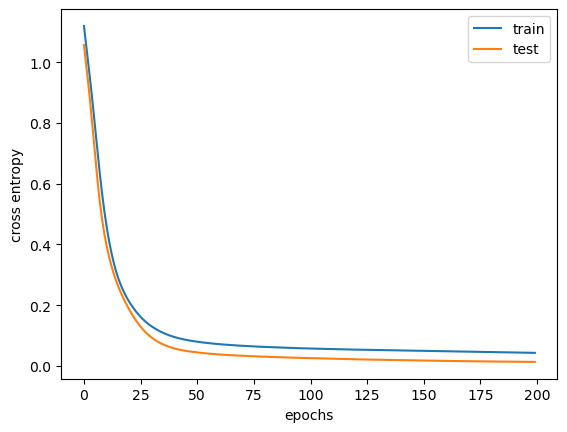

In [12]:
# Restore best model
#model.load_state_dict(best_weights)
 
# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

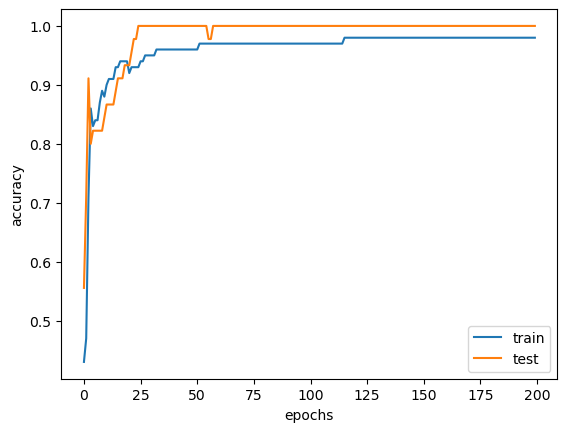

In [13]:
plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [14]:
predictions_train = []
predictions_test =  []

with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [15]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [16]:
print(f"Training Accuracy: {train_acc*100:.3f}%")
print(f"Test Accuracy: {test_acc*100:.3f}%")


Training Accuracy: 97.143%
Test Accuracy: 100.000%
